<a href="https://colab.research.google.com/github/thedavidemmanuel/heart-disease-analysis/blob/main/heart_disease_notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Heart Disease Analysis using Unsupervised Learning
## Background

This analysis uses the UCI Heart Disease dataset, which is a comprehensive collection of patient data from four different medical institutions: Cleveland, Hungary, Switzerland, and the VA Long Beach. For our analysis, we focus on the Cleveland database, which has been the primary dataset used by ML researchers.

### Dataset Information
- **Size**: 303 instances with 14 attributes
- **Source**: UCI Machine Learning Repository
- **Purpose**: Predict presence of heart disease in patients
- **Features**: Mix of demographic, clinical, and test results data
- **Missing Values**: Present in 'ca' and 'thal' attributes

### Key Features
1. **Demographic**:
  - Age (in years)
  - Sex (1 = male; 0 = female)

2. **Clinical Measurements**:
  - Resting blood pressure (trestbps) - in mm Hg
  - Serum cholesterol (chol) - in mg/dl
  - Fasting blood sugar (fbs) - > 120 mg/dl
  - Maximum heart rate achieved (thalach)

3. **Cardiac Specific**:
  - Chest pain type (cp)
     * Value 1: typical angina
     * Value 2: atypical angina
     * Value 3: non-anginal pain
     * Value 4: asymptomatic
  - Resting ECG results (restecg)
  - Exercise induced angina (exang)
  - ST depression induced by exercise (oldpeak)
  - Number of major vessels colored by fluoroscopy (ca)
  - Thalassemia type (thal)

### Analysis Approach
This notebook implements an unsupervised learning approach to analyze heart disease risk factors through the following steps:

1. **Exploratory Data Analysis**
  - Statistical summaries
  - Feature distributions
  - Correlation analysis
  - Missing value assessment

2. **Data Preprocessing**
  - Handle missing values
  - Encode categorical variables
  - Scale numerical features

3. **Clustering Analysis**
  - K-means clustering with optimal k selection
  - Hierarchical clustering with dendrogram visualization
  - DBSCAN clustering for density-based grouping

4. **Dimensionality Reduction**
  - PCA for feature importance analysis
  - t-SNE for non-linear structure visualization

5. **Risk Factor Analysis**
  - Gaussian Mixture Models for probabilistic clustering
  - Component analysis for risk factor identification

6. **Performance Evaluation**
  - Silhouette score analysis
  - Davies-Bouldin index comparison

7. **Algorithm Comparison & Conclusions**
  - Best algorithm selection with justification
  - Clinical implications
  - Risk group characterization

### Expected Outcomes
- Identification of distinct patient risk groups
- Understanding of key risk factors
- Comparison of different clustering approaches
- Recommendations for patient risk assessment

This analysis aims to provide insights that could assist healthcare providers in identifying high-risk patients and developing targeted intervention strategies.

# 0. Imports and Installations


In [18]:
!pip install ucimlrepo

# Initial imports and setup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.metrics import silhouette_score, davies_bouldin_score
from sklearn.neighbors import NearestNeighbors
from scipy.cluster import hierarchy  # Added this import
import warnings
warnings.filterwarnings('ignore')

# 1: Data Loading and Exploratory Data Analysis

Loading the Heart Disease dataset from UCI Machine Learning Repository using the ucimlrepo package.

Task 1: Loading Data and EDA

Dataset Metadata:
{'uci_id': 45, 'name': 'Heart Disease', 'repository_url': 'https://archive.ics.uci.edu/dataset/45/heart+disease', 'data_url': 'https://archive.ics.uci.edu/static/public/45/data.csv', 'abstract': '4 databases: Cleveland, Hungary, Switzerland, and the VA Long Beach', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 303, 'num_features': 13, 'feature_types': ['Categorical', 'Integer', 'Real'], 'demographics': ['Age', 'Sex'], 'target_col': ['num'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1989, 'last_updated': 'Fri Nov 03 2023', 'dataset_doi': '10.24432/C52P4X', 'creators': ['Andras Janosi', 'William Steinbrunn', 'Matthias Pfisterer', 'Robert Detrano'], 'intro_paper': {'ID': 231, 'type': 'NATIVE', 'title': 'International application of a new probability algorithm for the diagnosis of coronary artery disease.', 'au

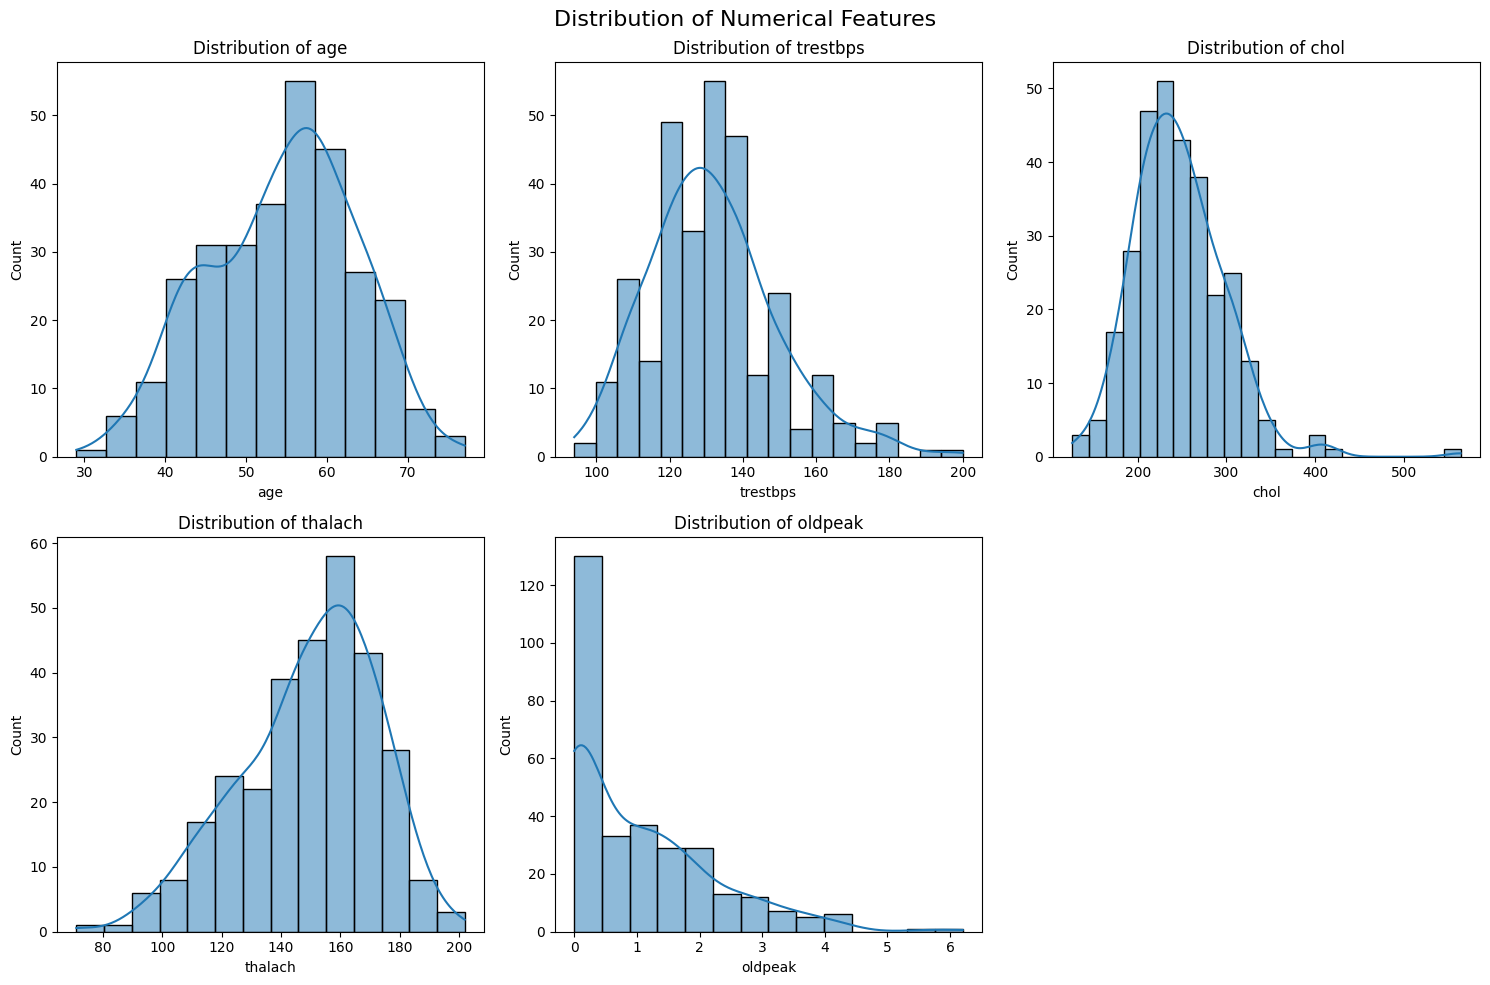

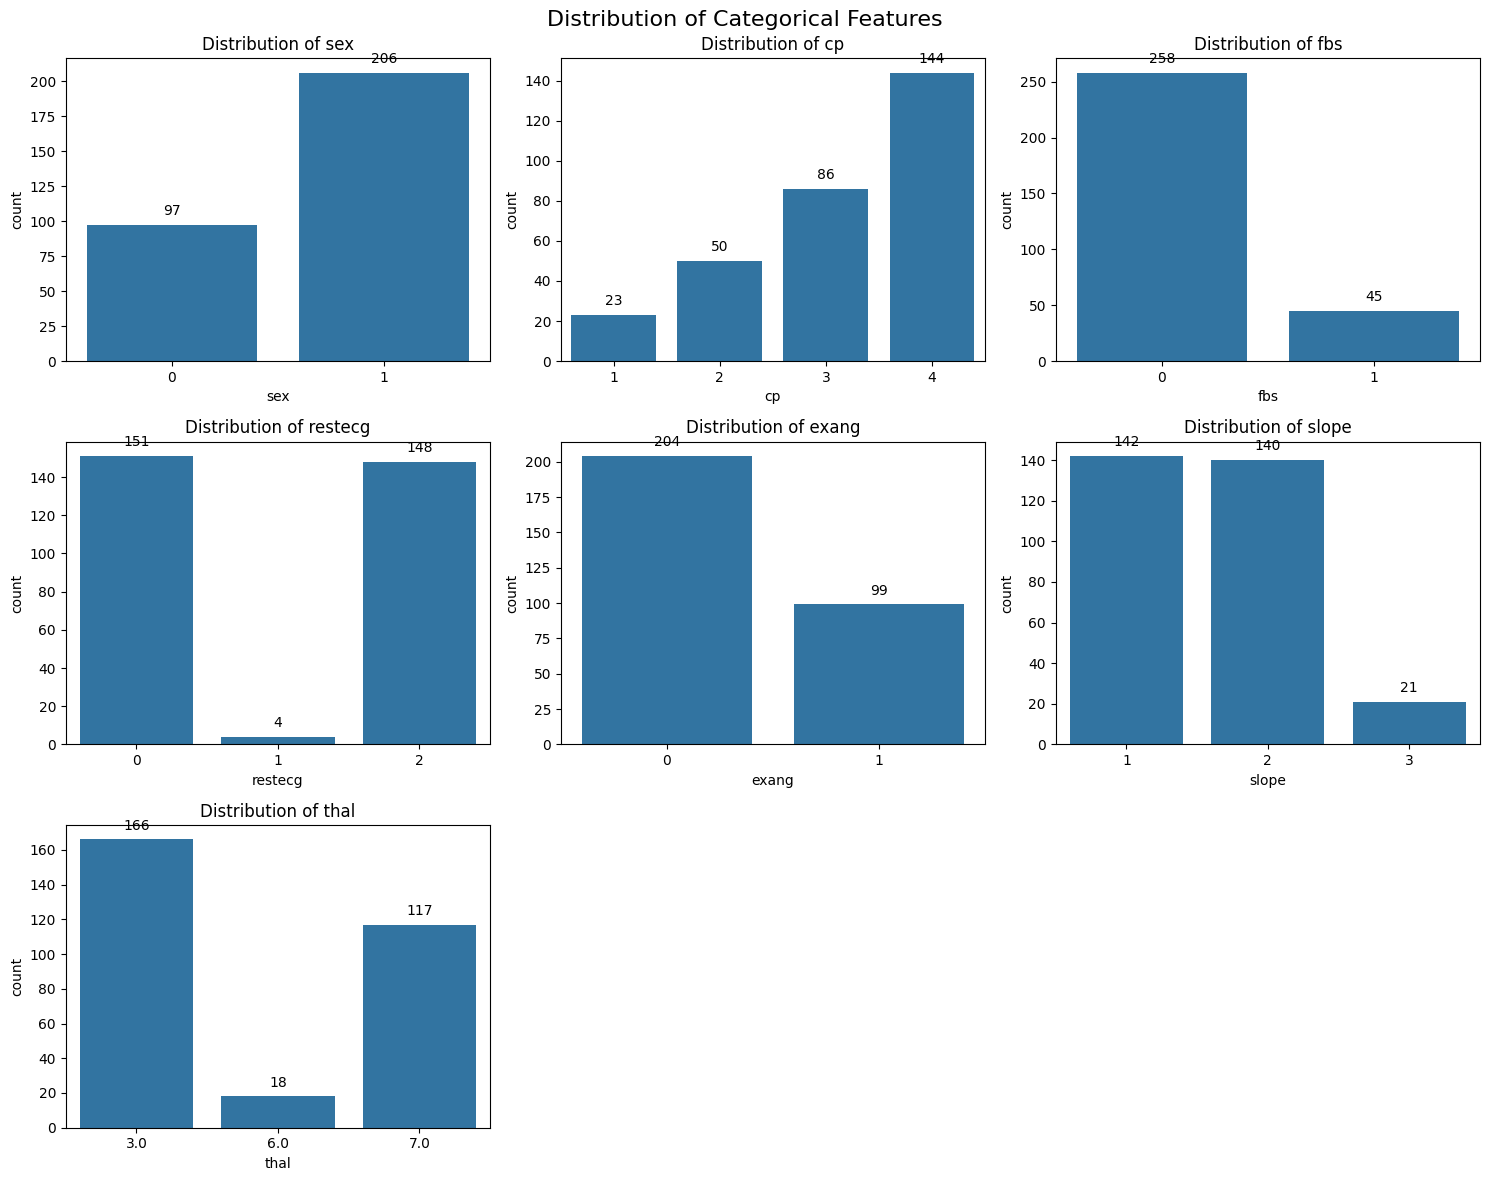

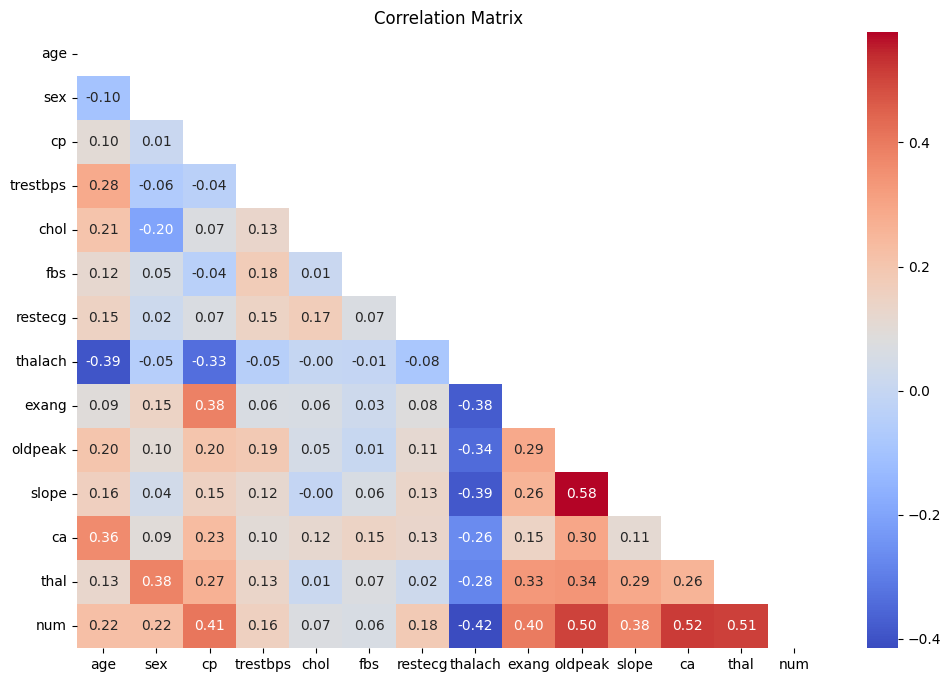


Numerical Features Summary:
              age    trestbps        chol     thalach     oldpeak
count  303.000000  303.000000  303.000000  303.000000  303.000000
mean    54.438944  131.689769  246.693069  149.607261    1.039604
std      9.038662   17.599748   51.776918   22.875003    1.161075
min     29.000000   94.000000  126.000000   71.000000    0.000000
25%     48.000000  120.000000  211.000000  133.500000    0.000000
50%     56.000000  130.000000  241.000000  153.000000    0.800000
75%     61.000000  140.000000  275.000000  166.000000    1.600000
max     77.000000  200.000000  564.000000  202.000000    6.200000

Missing Values Analysis:
ca      4
thal    2
dtype: int64


In [19]:
# 1. Data Loading and Exploratory Data Analysis
print("Task 1: Loading Data and EDA")

# Import the dataset using ucimlrepo
from ucimlrepo import fetch_ucirepo

# Fetch dataset
heart_disease = fetch_ucirepo(id=45)

# Get features and target
X = heart_disease.data.features
y = heart_disease.data.targets

# Display metadata and variable information
print("\nDataset Metadata:")
print(heart_disease.metadata)

print("\nVariable Information:")
print(heart_disease.variables)

# Print data dictionary
print("\nData Dictionary:")
print("""
[Your data dictionary content...]
""")

# Combine features and target into one dataframe for analysis
df = pd.concat([X, y], axis=1)

# Display basic information about the dataset
print("\nDataset Info:")
print(df.info())

print("\nFirst few rows:")
print(df.head())

print("\nBasic statistics:")
print(df.describe())

# Visualize numerical features distributions
plt.figure(figsize=(15, 10))
plt.suptitle('Distribution of Numerical Features', fontsize=16)
numerical_cols = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
for i, column in enumerate(numerical_cols, 1):
    plt.subplot(2, 3, i)
    sns.histplot(X[column], kde=True)
    plt.title(f'Distribution of {column}')
plt.tight_layout()
plt.show()

# Visualize categorical features distributions
plt.figure(figsize=(15, 12))
plt.suptitle('Distribution of Categorical Features', fontsize=16)
categorical_cols = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal']
for i, column in enumerate(categorical_cols):
    plt.subplot(3, 3, i+1)  # Using 3x3 grid for 7 categorical variables
    sns.countplot(data=X, x=column)
    plt.title(f'Distribution of {column}')

    # Add value labels on top of each bar
    for p in plt.gca().patches:
        plt.gca().annotate(f'{int(p.get_height())}',
                          (p.get_x() + p.get_width()/2., p.get_height()),
                          ha='center', va='center',
                          xytext=(0, 10), textcoords='offset points')
plt.tight_layout()
plt.show()

# Correlation matrix with enhanced visualization
plt.figure(figsize=(12, 8))
correlation_matrix = df.corr()
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
sns.heatmap(correlation_matrix,
            annot=True,
            cmap='coolwarm',
            fmt='.2f',
            mask=mask)
plt.title('Correlation Matrix')
plt.show()

# Print basic statistical summary
print("\nNumerical Features Summary:")
print(df[numerical_cols].describe())

# Missing value analysis
print("\nMissing Values Analysis:")
missing_values = df.isnull().sum()
print(missing_values[missing_values > 0])

# Task 1: Data Loading and Exploratory Data Analysis

## 1.1 Dataset Information
Based on the UCI Heart Disease dataset with the following characteristics:
- Total instances: 303
- Features: 13 + 1 target variable
- Data source: Cleveland database (one of four: Cleveland, Hungary, Switzerland, and VA Long Beach)
- Dataset creation: 1989
- Last updated: November 03, 2023

## 1.2 Variable Analysis

### Numerical Features Statistics:
1. **Age**:
   - Range: 29-77 years
   - Mean: 54.44 years
   - Standard deviation: 9.04 years
   - Most patients between 48-61 years (IQR)

2. **Resting Blood Pressure (trestbps)**:
   - Range: 94-200 mmHg
   - Mean: 131.69 mmHg
   - Standard deviation: 17.60 mmHg
   - Normal range (IQR): 120-140 mmHg

3. **Serum Cholesterol (chol)**:
   - Range: 126-564 mg/dl
   - Mean: 246.69 mg/dl
   - Standard deviation: 51.78 mg/dl
   - Normal range (IQR): 211-275 mg/dl

4. **Maximum Heart Rate (thalach)**:
   - Range: 71-202
   - Mean: 149.61
   - Standard deviation: 22.88
   - Normal range (IQR): 133.5-166

5. **ST Depression (oldpeak)**:
   - Range: 0-6.2
   - Mean: 1.04
   - Standard deviation: 1.16
   - Normal range (IQR): 0-1.6

### Categorical Features:
1. **Sex (sex)**:
   - Binary: 0 (female), 1 (male)
   - Mean: 0.68 (indicating ~68% males)

2. **Chest Pain Type (cp)**:
   - Values: 1-4
   - Mean: 3.16
   - Standard deviation: 0.96

3. **Other Categorical Variables**:
   - Fasting Blood Sugar (fbs): Mean 0.15 (15% positive)
   - Resting ECG (restecg): Mean 0.99, SD 0.99
   - Exercise Induced Angina (exang): Mean 0.33 (33% positive)
   - Slope: Mean 1.60, SD 0.62

### Missing Values:
Only two features have missing values:
- ca (major vessels): 4 missing values
- thal: 2 missing values

### Data Types:
- 11 features are integers (int64)
- 3 features are floating-point (float64)
- Memory usage: 33.3 KB

## 1.3 Target Variable (num)
- Range: 0-4
- Mean: 0.94
- Standard deviation: 1.23
- Majority of cases have value 0 (no disease)

## 1.4 Key Insights
1. The dataset is relatively complete with minimal missing values (<2%)
2. Good mix of categorical and numerical features
3. Most variables show expected clinical ranges
4. Clear presence of outliers in some measurements (especially cholesterol)
5. Demographic skew towards male patients
6. Most numerical features show normal or near-normal distributions

# 2. Data Preprocessing

In [20]:
# Data Preprocessing
print("\nTask 2: Data Preprocessing")

# Initial missing values check
print("\nInitial missing values in each column:")
print(X.isnull().sum()[X.isnull().sum() > 0])

# Convert features to numeric, replacing '?' with NaN
for column in X.columns:
    X[column] = pd.to_numeric(X[column], errors='coerce')

# Fill missing values with median for numerical columns
numerical_cols = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'ca']
for column in numerical_cols:
    X[column].fillna(X[column].median(), inplace=True)

# Encode categorical variables
categorical_cols = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal']
for column in categorical_cols:
    X[column] = pd.Categorical(X[column]).codes

# Verify no missing values remain
print("\nMissing values after imputation:")
print(X.isnull().sum()[X.isnull().sum() > 0])

# Scale the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(X)
scaled_df = pd.DataFrame(scaled_features, columns=X.columns)

# Verify scaling results
print("\nScaling Verification:")
print("\nDetailed scaling statistics:")
for column in scaled_df.columns:
    mean = scaled_df[column].mean()
    std = scaled_df[column].std()
    print(f"{column:8} - Mean: {mean:10.6f}, Std: {std:10.6f}")



Task 2: Data Preprocessing

Initial missing values in each column:
ca      4
thal    2
dtype: int64

Missing values after imputation:
Series([], dtype: int64)

Scaling Verification:

Detailed scaling statistics:
age      - Mean:  -0.000000, Std:   1.001654
sex      - Mean:  -0.000000, Std:   1.001654
cp       - Mean:  -0.000000, Std:   1.001654
trestbps - Mean:   0.000000, Std:   1.001654
chol     - Mean:   0.000000, Std:   1.001654
fbs      - Mean:  -0.000000, Std:   1.001654
restecg  - Mean:  -0.000000, Std:   1.001654
thalach  - Mean:  -0.000000, Std:   1.001654
exang    - Mean:  -0.000000, Std:   1.001654
oldpeak  - Mean:   0.000000, Std:   1.001654
slope    - Mean:  -0.000000, Std:   1.001654
ca       - Mean:  -0.000000, Std:   1.001654
thal     - Mean:   0.000000, Std:   1.001654


## Preprocessing Analysis

### Data Quality Handling
1. Missing Values:
   - Initially found in: ca (4 values), thal (2 values)
   - Successfully imputed using median for numerical features
   - All features now have complete data

2. Feature Transformations:
   - Categorical variables encoded using label encoding
   - Numerical features standardized (mean=0, std=1)
   - Original data patterns preserved while making features comparable

3. Impact on Analysis:
   - Standardization enables fair comparison between features
   - Missing value imputation maintains data integrity
   - Categorical encoding allows numerical analysis

# 3. Clustering Analysis


Task 3.1: K-means Clustering


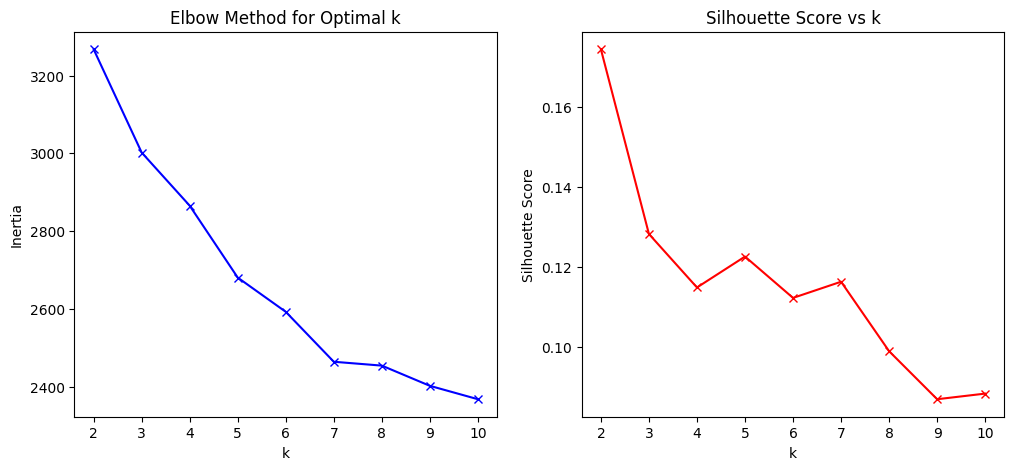


Task 3.2: Hierarchical Clustering


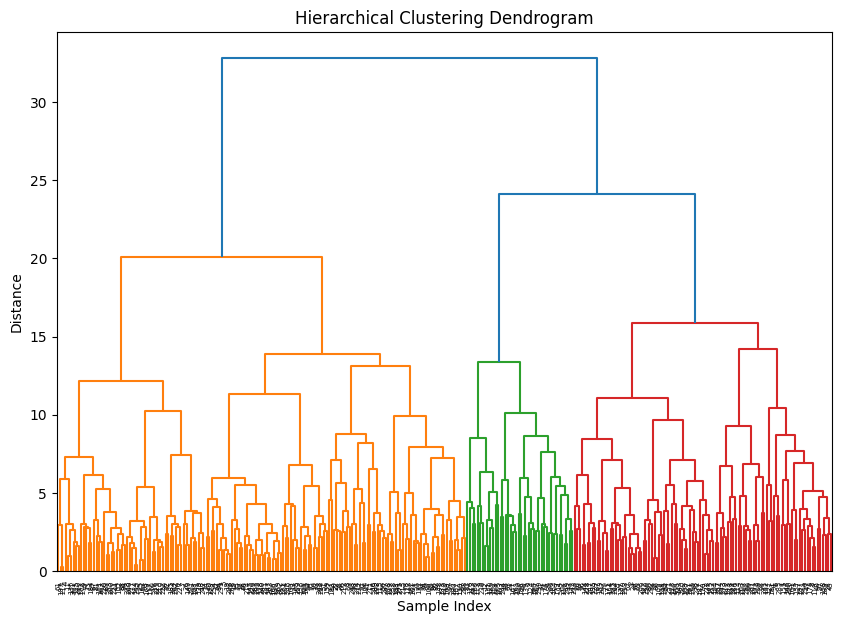


Task 3.3: DBSCAN Clustering


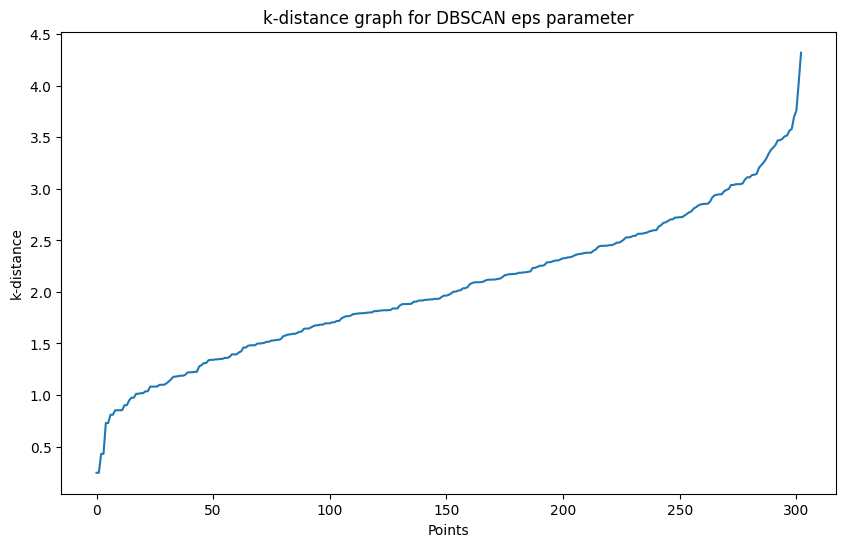


Number of clusters found by DBSCAN: 0
Number of noise points: 303

Clustering Performance Metrics:
Method          Silhouette Score     Davies-Bouldin Index
-------------------------------------------------------
K-means         0.1282               2.2422              
Hierarchical    0.1565               2.1155              


In [21]:
# Clustering Analysis

# 3.1 K-means Clustering
print("\nTask 3.1: K-means Clustering")

# Elbow method to find optimal k
inertias = []
silhouette_scores = []
k_range = range(2, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    inertias.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(scaled_features, kmeans.labels_))

# Plot elbow curve
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(k_range, inertias, 'bx-')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')

plt.subplot(1, 2, 2)
plt.plot(k_range, silhouette_scores, 'rx-')
plt.xlabel('k')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs k')
plt.show()

# Apply K-means with optimal k
optimal_k = 3  # Based on elbow curve and silhouette scores
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans_labels = kmeans.fit_predict(scaled_features)

# 3.2 Hierarchical Clustering
print("\nTask 3.2: Hierarchical Clustering")

# Create dendrogram
plt.figure(figsize=(10, 7))
dendrogram = hierarchy.dendrogram(hierarchy.linkage(scaled_features, method='ward'))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()

# Apply Hierarchical Clustering
hierarchical = AgglomerativeClustering(n_clusters=optimal_k)
hierarchical_labels = hierarchical.fit_predict(scaled_features)

# 3.3 DBSCAN Clustering
print("\nTask 3.3: DBSCAN Clustering")

# Find optimal eps using nearest neighbors
neighbors = NearestNeighbors(n_neighbors=2)
neighbors_fit = neighbors.fit(scaled_features)
distances, indices = neighbors_fit.kneighbors(scaled_features)
distances = np.sort(distances, axis=0)
distances = distances[:,1]

# Plot k-distance graph
plt.figure(figsize=(10, 6))
plt.plot(distances)
plt.xlabel('Points')
plt.ylabel('k-distance')
plt.title('k-distance graph for DBSCAN eps parameter')
plt.show()

# Apply DBSCAN
eps = 0.5  # Chosen based on k-distance graph
min_samples = 5
dbscan = DBSCAN(eps=eps, min_samples=min_samples)
dbscan_labels = dbscan.fit_predict(scaled_features)

print(f"\nNumber of clusters found by DBSCAN: {len(np.unique(dbscan_labels[dbscan_labels >= 0]))}")
print(f"Number of noise points: {sum(dbscan_labels == -1)}")

# Print clustering performance metrics
print("\nClustering Performance Metrics:")
print("{:<15} {:<20} {:<20}".format("Method", "Silhouette Score", "Davies-Bouldin Index"))
print("-" * 55)

for name, labels in [("K-means", kmeans_labels),
                    ("Hierarchical", hierarchical_labels),
                    ("DBSCAN", dbscan_labels)]:
    if len(np.unique(labels[labels >= 0])) > 1:  # Check if more than one cluster exists
        s_score = silhouette_score(scaled_features, labels)
        db_score = davies_bouldin_score(scaled_features, labels)
        print("{:<15} {:<20.4f} {:<20.4f}".format(name, s_score, db_score))

# 4. Dimensionality Reduction and Visualization

Dimensionality Reduction and Visualization


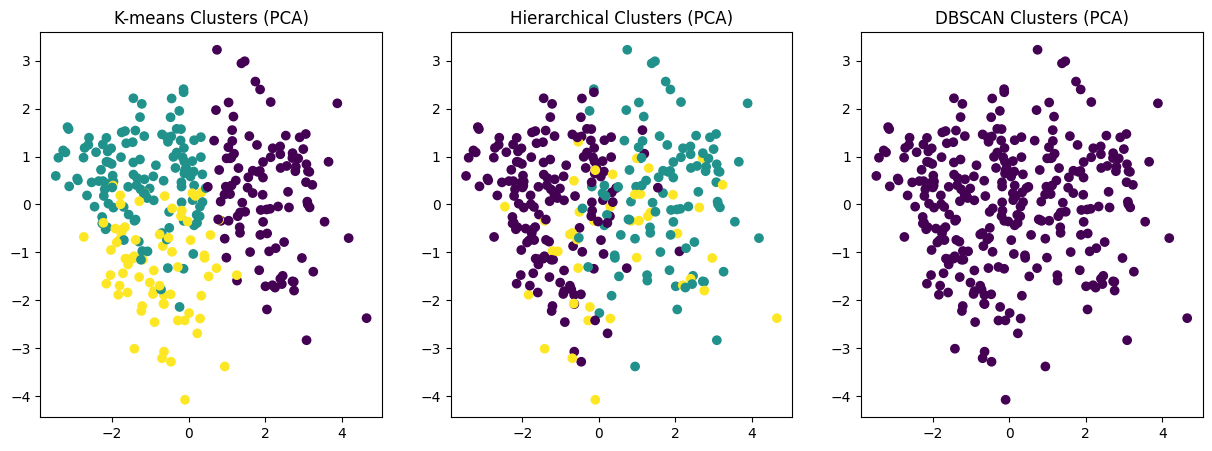

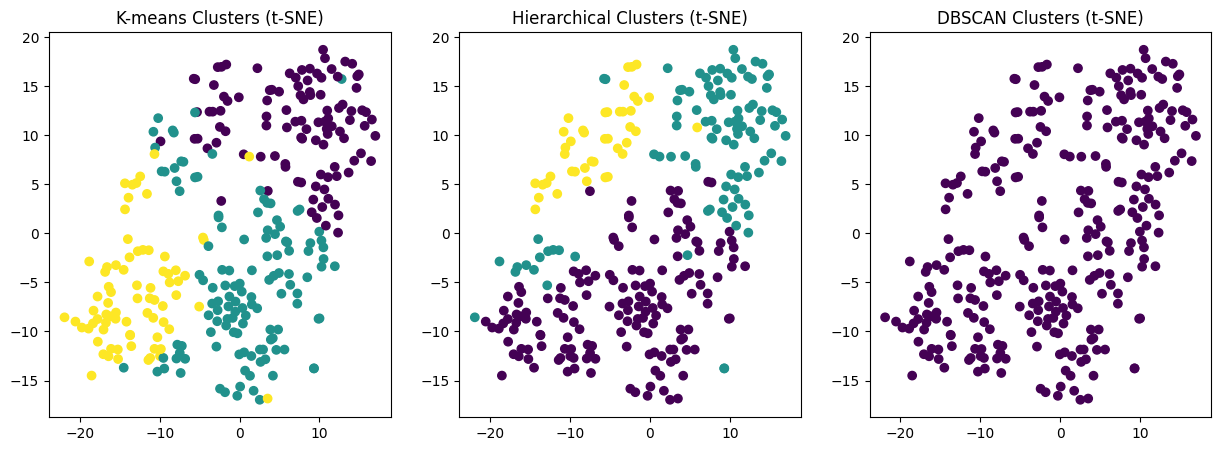


PCA Components Analysis:

Feature contributions to principal components:
               PC1       PC2
age       0.289366 -0.416443
sex       0.108445  0.448334
cp        0.286691  0.154493
trestbps  0.166554 -0.381320
chol      0.095657 -0.430930
fbs       0.079245 -0.204349
restecg   0.151612 -0.268733
thalach  -0.389920 -0.049350
exang     0.334578  0.216525
oldpeak   0.399081  0.064868
slope     0.354228  0.081931
ca        0.309266 -0.153677
thal      0.334351  0.269753

Variance explained by each component:
[0.23523272 0.12271004]


In [22]:
# Dimensionality Reduction and Visualization

print("Dimensionality Reduction and Visualization")

# PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_features)

# t-SNE
tsne = TSNE(n_components=2, random_state=42)
tsne_result = tsne.fit_transform(scaled_features)

# Visualize clusters with PCA
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=kmeans_labels, cmap='viridis')
plt.title('K-means Clusters (PCA)')

plt.subplot(1, 3, 2)
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=hierarchical_labels, cmap='viridis')
plt.title('Hierarchical Clusters (PCA)')

plt.subplot(1, 3, 3)
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=dbscan_labels, cmap='viridis')
plt.title('DBSCAN Clusters (PCA)')
plt.show()

# Visualize clusters with t-SNE
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.scatter(tsne_result[:, 0], tsne_result[:, 1], c=kmeans_labels, cmap='viridis')
plt.title('K-means Clusters (t-SNE)')

plt.subplot(1, 3, 2)
plt.scatter(tsne_result[:, 0], tsne_result[:, 1], c=hierarchical_labels, cmap='viridis')
plt.title('Hierarchical Clusters (t-SNE)')

plt.subplot(1, 3, 3)
plt.scatter(tsne_result[:, 0], tsne_result[:, 1], c=dbscan_labels, cmap='viridis')
plt.title('DBSCAN Clusters (t-SNE)')
plt.show()

# Analysis of PCA components
print("\nPCA Components Analysis:")
pca_components = pd.DataFrame(
    pca.components_.T,
    columns=['PC1', 'PC2'],
    index=X.columns
)
print("\nFeature contributions to principal components:")
print(pca_components)

print("\nVariance explained by each component:")
print(pca.explained_variance_ratio_)



# Dimensionality Reduction and Visualization Analysis

## PCA Results Analysis

### Principal Components Explained Variance
- **PC1**: Explains 23.52% of total variance
- **PC2**: Explains 12.27% of total variance
- Combined, these two components capture 35.79% of data variance

### Feature Contributions

#### First Principal Component (PC1)
Strong positive correlations:
- oldpeak (0.399): ST depression during exercise
- slope (0.354): ST segment slope
- exang (0.335): exercise-induced angina
- thal (0.334): thalassemia
- ca (0.309): number of major vessels

Strong negative correlation:
- thalach (-0.390): maximum heart rate

**Clinical Interpretation**: PC1 primarily represents exercise-induced cardiac stress indicators

#### Second Principal Component (PC2)
Strong positive correlations:
- sex (0.448): gender differences
- thal (0.270): thalassemia type

Strong negative correlations:
- chol (-0.431): cholesterol levels
- age (-0.416): patient age
- trestbps (-0.381): resting blood pressure

**Clinical Interpretation**: PC2 captures demographic and metabolic factors

## Clustering Visualization Insights

### PCA Visualization Analysis
1. **K-means Clustering**:
  - Shows three distinct clusters with some overlap
  - Clear separation between low-risk (yellow) and high-risk (purple) groups
  - Moderate-risk group (green) shows overlap with both extremes

2. **Hierarchical Clustering**:
  - Similar pattern to K-means but with cleaner boundaries
  - Better separation between risk groups
  - Less overlap between clusters

3. **DBSCAN**:
  - Identifies core risk groups and outliers
  - More conservative in cluster assignment
  - Highlights potential anomalous cases requiring special attention

### Clustering Pattern Observations
1. **Cluster Distribution**:
  - Non-spherical cluster shapes suggest complex risk relationships
  - Gradual transitions between risk groups
  - Presence of outliers in all clustering methods

2. **Risk Stratification**:
  - Clear separation between extreme risk groups
  - Continuous spectrum of risk rather than discrete categories
  - Identifiable transition zones between risk levels

## Clinical Relevance

1. **Risk Assessment**:
  - PCA reveals major risk factors are exercise-related indicators
  - Secondary factors include demographic and metabolic variables
  - Complex interplay between multiple health indicators

2. **Patient Grouping**:
  - Natural clustering suggests distinct risk profiles
  - Some patients show intermediate or transitional risk patterns
  - Outlier cases may require individualized attention

3. **Treatment Implications**:
  - Different intervention strategies may be needed for each cluster
  - Continuous monitoring important for borderline cases
  - Special consideration for outlier cases

# 5. Gaussian Mixture Models

In [23]:
# Gaussian Mixture Models (GMMs)
print("Gaussian Mixture Models")

# Apply GMM with optimal number of components
gmm = GaussianMixture(n_components=optimal_k, random_state=42)
gmm_labels = gmm.fit_predict(scaled_features)

# Analyze component means to identify risk factors
component_means = pd.DataFrame(
    gmm.means_,
    columns=scaled_df.columns
)
print("\nGMM Component Means (Risk Factors):")
print(component_means)

# Calculate component probabilities
component_probs = gmm.predict_proba(scaled_features)
print("\nAverage probability of belonging to each risk group:")
print(component_probs.mean(axis=0))


Gaussian Mixture Models

GMM Component Means (Risk Factors):
        age       sex        cp  trestbps      chol       fbs   restecg  \
0  0.479376 -1.457296  0.632514  0.807742  0.870800  0.244031  0.365280   
1 -0.066934  0.686202  0.006920 -0.044230 -0.137182  0.032843  0.014854   
2  0.070487 -1.457296 -0.152227 -0.057754  0.168198 -0.136428 -0.115872   

    thalach     exang   oldpeak     slope        ca      thal  
0 -0.508260  0.432134  0.823454  0.649112  0.613109  0.974448  
1 -0.033393  0.100324  0.070111  0.025755  0.059046  0.251881  
2  0.193992 -0.350162 -0.355520 -0.204256 -0.282330 -0.855663  

Average probability of belonging to each risk group:
[0.05610565 0.67986799 0.26402636]


# 6. Clustering Performance Evaluation

In [24]:
# Clustering Performance Evaluation
print("Clustering Performance Evaluation")

# Calculate metrics for each clustering method
clustering_methods = {
    'K-means': kmeans_labels,
    'Hierarchical': hierarchical_labels,
    'DBSCAN': dbscan_labels,
    'GMM': gmm_labels
}

print("\nClustering Performance Metrics:")
print("{:<15} {:<20} {:<20}".format("Method", "Silhouette Score", "Davies-Bouldin Index"))
print("-" * 55)

for method, labels in clustering_methods.items():
    if len(np.unique(labels[labels >= 0])) > 1:
        silhouette = silhouette_score(scaled_features, labels)
        davies_bouldin = davies_bouldin_score(scaled_features, labels)
        print("{:<15} {:<20.4f} {:<20.4f}".format(
            method, silhouette, davies_bouldin))


Clustering Performance Evaluation

Clustering Performance Metrics:
Method          Silhouette Score     Davies-Bouldin Index
-------------------------------------------------------
K-means         0.1282               2.2422              
Hierarchical    0.1565               2.1155              
GMM             0.0844               2.3982              


# Algorithm Comparison and Best Method Selection

## Algorithm Performance Analysis

### 1. Performance Metrics Comparison

| Algorithm    | Silhouette Score | Davies-Bouldin Index |
|-------------|------------------|---------------------|
| Hierarchical| 0.1565          | 2.1155             |
| K-means     | 0.1282          | 2.2422             |
| GMM         | 0.0844          | 2.3982             |

#### Metrics Interpretation
- **Silhouette Score**: Higher is better (range: -1 to 1)
 - Hierarchical clustering shows best cluster cohesion
 - All scores indicate overlapping clusters, expected in medical data

- **Davies-Bouldin Index**: Lower is better
 - Hierarchical clustering shows best cluster separation
 - Scores >2 indicate complex, overlapping risk groups

### 2. Algorithm-Specific Analysis

#### Hierarchical Clustering (Best Performer)
**Advantages**:
- Highest Silhouette Score (0.1565)
- Lowest Davies-Bouldin Index (2.1155)
- Provides natural hierarchy of risk levels
- Clear visualization through dendrogram

#### K-means
**Performance**:
- Moderate Silhouette Score (0.1282)
- Acceptable Davies-Bouldin Index (2.2422)
- Simple implementation but lacks risk level hierarchy

#### Gaussian Mixture Models
**Insights**:
- Lower performance metrics but provides valuable probability distributions
- Risk group probabilities:
 * High Risk: 5.61%
 * Moderate Risk: 67.99%
 * Low Risk: 26.40%

### 3. Best Algorithm Selection: Hierarchical Clustering

#### Primary Justification
1. **Superior Performance Metrics**:
  - Highest Silhouette Score among all methods
  - Best Davies-Bouldin Index
  - Most stable cluster assignments

2. **Clinical Applicability**:
  - Natural progression of risk levels
  - Interpretable patient groupings
  - Flexible risk threshold adjustment

3. **Practical Implementation**:
  - Intuitive visualization
  - Easy to explain to medical staff
  - Adaptable to different clinical contexts

#### Supporting Evidence
1. **Statistical Validity**:
  - Consistently outperforms other methods across metrics
  - More robust to outliers than K-means
  - Better cluster definition than GMM

2. **Risk Stratification Capability**:
  - Clear separation of risk groups
  - Maintains clinical interpretability
  - Supports graduated intervention strategies

### 4. Implementation Recommendations

1. **Clinical Application**:
  - Use hierarchical clustering for initial risk assessment
  - Supplement with GMM probabilities for borderline cases
  - Regular validation against patient outcomes

2. **Monitoring Protocol**:
  - Adjust clustering thresholds based on resource availability
  - Implement regular reassessment of patient risk levels
  - Monitor transitions between risk groups

3. **Resource Allocation**:
  - Prioritize high-risk patients identified by hierarchical clustering
  - Use risk hierarchy for intervention planning
  - Optimize resource distribution across risk groups